In [2]:
# Importing relevant libraries
import gym
import numpy as np
import matplotlib.pyplot as plt
# Defining the policies
def theta_policy(observation):
    theta = observation[2]
    action = 0 if theta < 0 else 1
    return action

def omega_policy(observation):
    omega = observation[3]
    action = 0 if omega < 0 else 1
    return action

def run_policy(env, policy_function, episodes):
    rewards = []
    for episode in range(episodes):
        total_reward = 0
        observation = env.reset()

        while True:
            action = policy_function(observation)
            observation, reward, done, _ = env.step(action)
            total_reward += reward

            if done:
                break

        rewards.append(total_reward)
    return rewards

def plot_rewards(rewards, policy_name):
    plt.plot(range(1, len(rewards) + 1), np.cumsum(rewards), label=policy_name)


In [3]:
# Initialize the CartPole-v0 environment
env = gym.make('CartPole-v0')

# Specify the number of episodes
episodes = 100

# Run policies
theta_rewards = run_policy(env, theta_policy, episodes)
omega_rewards = run_policy(env, omega_policy, episodes)

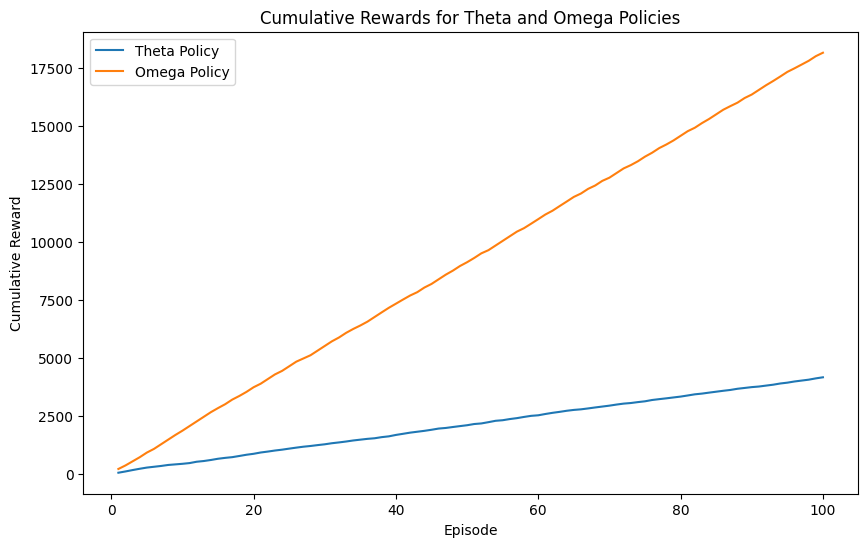

In [4]:
# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plot_rewards(theta_rewards, 'Theta Policy')
plot_rewards(omega_rewards, 'Omega Policy')
plt.title('Cumulative Rewards for Theta and Omega Policies')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()


In [5]:
# Calculate and print average rewards with standard deviation
theta_avg_reward = np.mean(theta_rewards)
theta_std_dev = np.std(theta_rewards)
print(f'Theta Policy - Average Reward: {theta_avg_reward}, Standard Deviation: {theta_std_dev}')

omega_avg_reward = np.mean(omega_rewards)
omega_std_dev = np.std(omega_rewards)
print(f'Omega Policy - Average Reward: {omega_avg_reward}, Standard Deviation: {omega_std_dev}')

# Close the environment
env.close()

Theta Policy - Average Reward: 41.57, Standard Deviation: 9.201364029316522
Omega Policy - Average Reward: 181.66, Standard Deviation: 21.51288915975723
